![Astrofisica Computacional](../logo.PNG)

---
## 01. Fourier Transform


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

Fourier transforms of a function are presented in this notebook.

---

Fourier transforms are a very important tool to understand, analyze, smooth and filter functions or signals. They also allow to solve some differential equations.

---
## Fourier series

We will consider a periodic function $f(x)$ on a finite interval $0\leq x < L$. If the function is even (symmetric) about the midpoint $x = \frac{L}{2}$, the function can be expanded into a cosine series of the form

\begin{equation}
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos \left( \frac{2\pi kx}{L} \right).
\end{equation}

If the function is odd with respect to the midpoint of the interval, it can be expanded in terms of sine functions,

\begin{equation}
f(x) = \sum_{k=1}^{\infty} \beta_k \sin \left( \frac{2\pi kx}{L} \right).
\end{equation}

In both cases, the coefficients $\alpha_k$ and $\beta_k$ are constants that determine the different contributions in the superposition.

In the case of a general function (without a special symmetry), the expansion can be performed

\begin{equation}
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos \left( \frac{2\pi kx}{L} \right) + \sum_{k=1}^{\infty } \beta_k \sin \left( \frac{2\pi kx}{L} \right)
\end{equation}

which can be rewritten in terms of complex exponential functions,

\begin{equation}
f(x) = \sum_{k=-\infty}^{\infty} \gamma_k \exp \left( i\frac{2\pi kx}{L} \right)
\end{equation}

where

\begin{equation}
\gamma_k =
\begin{cases}
\frac{1}{2}(\alpha_{-k} + i \beta_{-k}) & \text{ if }k<0\\
\alpha_0 & \text{ if }k=0\\
\frac{1}{2}(\alpha_{k} - i \beta_{k}) & \text{ if }k>0
\end{cases}
\end{equation}

When the function $f(x)$ is not periodic, it is possible to perform the Fourier series expansion by considering the function on the interval $0\leq x <L$ and repeating this behavior over and over to the left and right. However, the series obtained will only be useful in the interval considered.

---
### Coefficients in the Fourier Series

The coefficients $\gamma_k$ are, in general, complex numbers and can be obtained using the expression

\begin{equation}
\gamma_k = \frac{1}{L} \int_0^L f(x) \exp \left( -i\frac{2\pi kx}{L}\right) dx .
\end{equation}

## Discrete Fourier Transform (DFT)

At a computational level, the integral that defines the coefficients in the Fourier series must be performed numerically. Discretizing the integration interval by defining $n$ nodes, we will have $N = n-1$ sub-intervals with size $\Delta x = \frac{L}{N}$. Using the trapezoid rule described in a previous class, we have

\begin{equation}
\gamma_k = \frac{1}{N}\left[ \frac{1}{2}f(0) + \frac{1}{2} f(L) + \sum_{j=1}^{N -1} f(x_j) \exp\left( -i \frac{2\pi kx_j}{L} \right) \right].
\end{equation}

Since the function must be periodic in the interval of integration , we have $f(0) = f(L)$ and thus the first two terms can be incorporated into the sum,

\begin{equation}
\gamma_k = \frac{1}{N}\sum_{j=0}^{N-1} f(x_j) \exp\left( -i \frac{2\pi kx_j}{L} \right).
\end{equation}

Finally, since the intervals are equal, we can write

\begin{equation}
x_j = \frac{j}{N}L
\end{equation}

The coefficients can be written in the form

\begin{equation}
\gamma_k = \frac{1}{N}\sum_{j=0}^{N-1} f(x_j) \exp\left( -i \frac{2\pi kj}{N} \right).
\end{equation}

Although this expression already corresponds to the Fourier transform, in many bibliographical references it is usually called *Discrete Fourier Transform (DFT)* to the coefficients

\begin{equation}
c_k = \sum_{j=0}^{N-1} f_j \exp\left( -i \frac{2\pi kj}{N} \right)
\end{equation}

such that $c_k = N \gamma_k$ and where $f_j = f(x_j)$ has been used.

From the coefficients obtained, the discretization of the function can be recovered. This is called *Inverse Discrete Fourier Transform* and corresponds to the relation

\begin{equation}
f_j = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp\left( i \frac{2\pi kj}{N} \right).
\end{equation}

### DFT of a Real Function

The results described above are applicable to real or complex functions. However, in the case of real functions, the computation time of the coefficients can be significantly reduced.

To understand why, consider the coefficient $c_k$ for an index $k$ less than $N$ but greater than $\frac{1}{2}N$. We can then rewrite $k = N - α$ with $1\leq α < \frac{1}{2}N$. It then has to

\begin{align}
c_{N-\alpha} = &\sum_{j=0}^{N-1} f_j \exp\left( -i \frac{2\pi (N-\alpha )j}{N} \right) \\
c_{N-\alpha} = & \sum_{j=0}^{N-1} f_j \exp\left( -i 2\pi j \right) \exp\left( i \frac{2\pi \alpha j}{N} \right) \\
c_{N-\alpha} = & \sum_{j=0}^{N-1} f_j \exp\left( i \frac{2\pi \alpha j}{N} \right)\\
c_{N-\alpha} = & c^*_\alpha,
\end{align}

where $^*$ means complex conjugate and the assumption of a real function has been used, i.e. $f^*(x) = f(x)$. This relationship means that

\begin{align}
c_{N-1} = &c^*_1 \\
c_{N-2} = &c^*_2 \\
c_{N-3} = &c^*_3 \\
...
\end{align}

It is then concluded that, for real functions, only the coefficients $c_k$ for $0\leq k \leq \frac{1}{2}N$ should be calculated and the others are automatically defined.

When $N$ is even, it is required to compute $\frac{1}{2}N + 1$ coefficients, while if $N$ is odd, it is required to compute $\frac{1}{2} (N+1) $ coefficients.

### Example

The `signal.txt` file contains the data of a signal for which we will calculate its DFT.

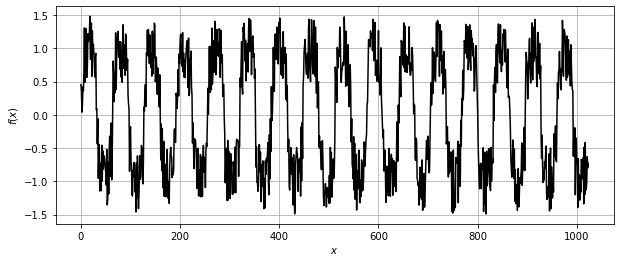

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
f_data = np.loadtxt( 'signal.txt')
x_data = np.arange(len(f_data))
plt.figure(figsize=(10,4))
plt.plot(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

The total number of data is

In [2]:
n = len(f_data)
n

1024

In [3]:
c = np.zeros(n//2+1, complex)
for k in range(n//2+1):
    for i in range(n):
        c[k] += f_data[i]*np.exp(-2j*np.pi*k*i/n) 


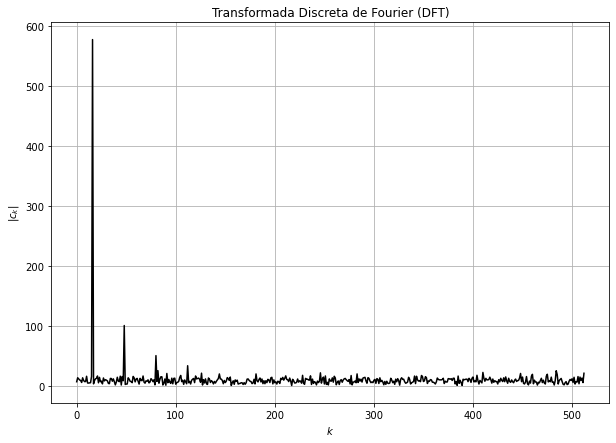

In [4]:
plt.figure(figsize=(10,7))
plt.plot(range(len(c)), abs(c), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| c_k \right|$')
plt.title(r'Transformada Discreta de Fourier (DFT)')
plt.grid()
plt.show()

## 2-Dimensional Fourier Transform

The presented development can be easily extended to the case of 2-dimensional functions, $f(x,y)$. To do this, the DFT is performed with respect to one of the variables and then with respect to the other variable independently.

Consider the function

\begin{equation}
f_{\mu, \nu} = f(x_\mu, y_\nu)
\end{equation}

with $\mu = 0, 1, 2, ..., m-1$ and $\nu = 0, 1, 2, ..., n-1$. First, the transform is performed on each of $\mu$,

\begin{equation}
c'_{\mu, \beta} = \sum_{\nu=0}^{N-1}f_{\mu,\nu} \exp \left( -i\frac{2\pi \beta \nu }{N} \right),
\end{equation}

where $N=n-1$. In this way, for each $\mu$ there are $N$ coefficients labeled with the index $\beta$.

Now the DFT is performed for each value of $\beta$,

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{M-1}c'_{\mu,\beta} \exp \left( -i\frac{2\pi \alpha \mu }{M} \right),
\end{equation}

where $M=m-1$. Joining these two equations gives the 2-dimensional transform

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{M-1}\sum_{\nu=0}^{N-1}f_{\mu,\nu} \exp \left( -i\frac{2\pi \beta \nu}{N} \right) \exp \left( -i\frac{2\pi \alpha \mu}{M} \right)
\end{equation}

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{M-1}\sum_{\nu=0}^{N-1}f_{\mu,\nu} \exp \left[ -i2\pi \left( \frac{ \alpha \mu}{M} + \frac{ \beta \nu}{N} \right) \right]
\end{equation}


Similarly, the inverse DFT turns out to be

\begin{equation}
f_{\mu, \nu} = \frac{1}{MN} \sum_{\alpha=0}^{M-1}\sum_{\beta=0}^{N-1} c_{\alpha, \beta} \exp \left[ i2\pi \left( \frac{ \alpha \mu}{M} + \frac{ \beta \nu}{N} \right) \right]
\end{equation}

---
## Fast Fourier Transform (FFT)

To perform the DFT,

\begin{equation}
c_k = \sum_{j=0}^{N-1} f_j \exp\left( -i \frac{2\pi kj}{N} \right)
\end{equation}

it is required to calculate $\frac{1}{2} (N+1)$ coefficients and in each of them $N$ terms must be added. So the total number of operations is $\frac{1}{2} (N+1)N \sim \mathcal{O} \left( \frac{1}{2} n
N^2\right)$.

To improve computation time, the process can be optimized by introducing the *Fast Fourier Transform (FFT)*. To understand this procedure we will assume that the sample has $N=2^m$ data. Since $N$ is a power of $2$ it is possible to divide the sample into two sub-sets of equal size: those with $j$ even and those with $j$ odd.

For even data, we write $j=2\alpha$ with $\alpha = 0,1,2,..,\frac{1}{2}N$ and with it, the DFT takes the form
 
\begin{equation}
E_k = \sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha} \exp\left( -i \frac{2\pi k(2\alpha )} {N} \right) = \sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha} \exp\left( -i \frac{2\pi k\alpha}{\frac{1}{2}N} \right)
\end{equation}

which simply corresponds to a DFT with $\frac{1}{2}N$ data.

Similarly, for odd values ​​$j=2\alpha +1$ is written and the DFT takes the form

\begin{equation}
\sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha+1} \exp\left( -i \frac{2\pi k(2\alpha +1 )}{N} \right) = \exp\left( -i \frac{2\pi k}{N} \right) \sum_{\alpha=0}^{\frac{1}{2}N- 1} f_{2\alpha+1} \exp\left( -i \frac{2\pi k\alpha}{\frac{1}{2}N} \right) = \exp\left( -i \frac{2\pi k}{N} \right) O_k
\end{equation}

where $O_k$ is a DFT with $\frac{1}{2}N$ data.

The Full Fourier coefficient is obtained by adding even and odd terms, i.e.

\begin{equation}
c_k =E_k + \exp\left( -i \frac{2\pi k}{N} \right) O_k
\end{equation}

From this expression it can be seen that, to calculate the coefficient $c_k$ in the DFT, it is required to calculate two terms $E_k$ and $O_k$ which are two smaller DFTs (with half the data) and a factor (twiddle factor) which is trivial to calculate.
This reduction process can be repeated again by dividing each of the coefficients into two smaller DFTs and an additional (twiddle) factor. The sub-division process is repeated until the moment is reached where each DFT is the transform of a single data. The corresponding Fourier coefficient is simply

\begin{equation}
c_0 = \sum_{j=0}^{0} f_0 e^0 = f_0,
\end{equation}

that is to say only one term!!!

To understand why the calculation time is improved with this procedure, we must note that to completely decompose the set of $2^m$ data, $m=\log_2 N$ levels of division are required. Therefore, the number of coefficients that must be calculated in the whole process is $N$ in each of the $\log_2 N$ levels and therefore the total number of operations involved is $\mathcal{O} \left( N \log_2 N\right)$ which is much better than the order $\mathcal{O} \left( \frac{1}{2} N^2\right)$ of the DFT.


For example, for a sample of $N= 10^6$ data the DFT requires $\mathcal{O} \left( \frac{1}{2} N^2\right) \sim 5 \times 10^{11 }$ operations while the FFT requires $\mathcal{O} \left( N \log_2 N\right) \sim 2 \times 10^7$ operations.

---
In python there are several implementations of the FFT. For example there are the functions

- [scipy.fft](https://docs.scipy.org/doc/scipy/tutorial/fft.html)
- [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.html)

In [5]:
from scipy.fft import fft

C = fft(f_data)
len(C)

1024

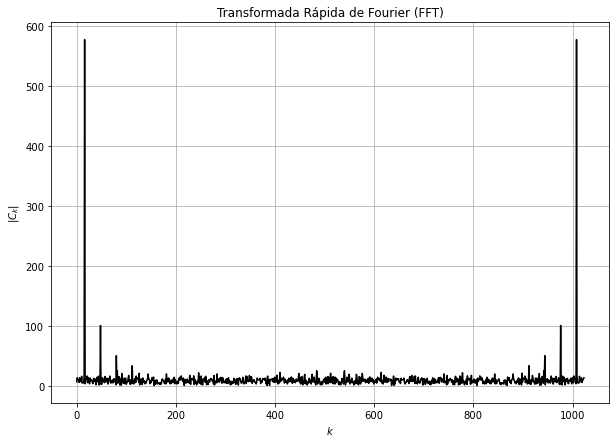

In [6]:
plt.figure(figsize=(10,7))
plt.plot(range(len(C)), abs(C), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| C_k \right|$')
plt.title(r'Transformada Rápida de Fourier (FFT)')
plt.grid()
plt.show()

---
## Filtering a Signal

First we will read the raw signal (signal+noise) and display it

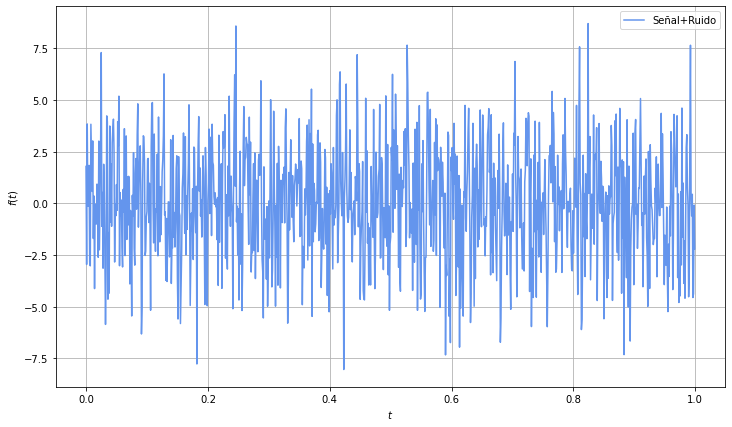

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
t, signal = np.loadtxt('synth_signal.txt', unpack=True)
clean_signal = np.loadtxt( 'clean_synth_signal.txt')
#minsignal, maxsignal = signal.min(), signal.max()

plt.figure(figsize=(12,7))
plt.plot(t, signal, color='cornflowerblue', label='Señal+Ruido')
#plt.plot(t, clean_signal, color='crimson', label='Señal')
plt.title('')
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()
plt.grid()
plt.show()

The FFT of this signal is

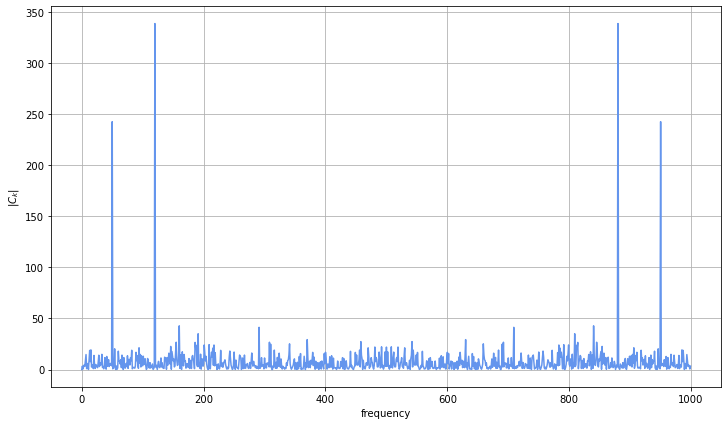

In [22]:
## Fast Fourier Transform
n = len(t)
c = np.fft.fft(signal) #computes the fft
dt = t[1] - t[0]
psd = c*np.conj(c)/n
freq = (1/(dt*n)) * np.arange(n) #frequency array

plt.figure(figsize=(12,7))
plt.plot(freq, abs(psd), color='cornflowerblue')
plt.title('')
plt.xlabel(r'frequency')
plt.ylabel(r'$\left| C_k \right|$')
plt.grid()
plt.show()

In [23]:
## Filter out noise
threshold = 100
psd_idxs = psd > threshold # array of 0s and 1s
psd_clean = psd * psd_idxs # zero out all the unnecessary powers
c_clean = psd_idxs * c # used to retrieve the signal

signal_filtered = np.fft.ifft(c_clean) #inverse fourier transform

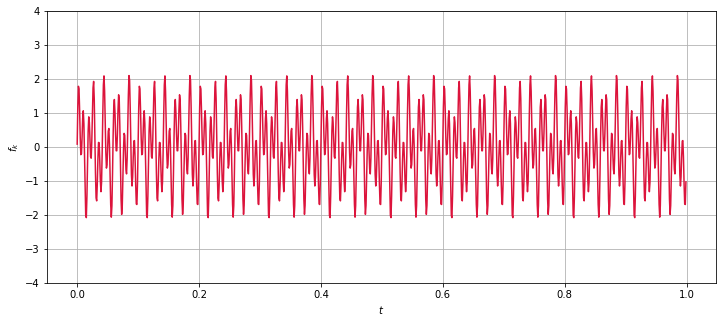

In [24]:
plt.figure(figsize=(12,5))
plt.plot(t, np.real(signal_filtered), color='crimson')
plt.ylim(-4,4)
plt.title('')
plt.xlabel(r'$t$')
plt.ylabel(r'$ f_k $')
plt.grid()
plt.show()

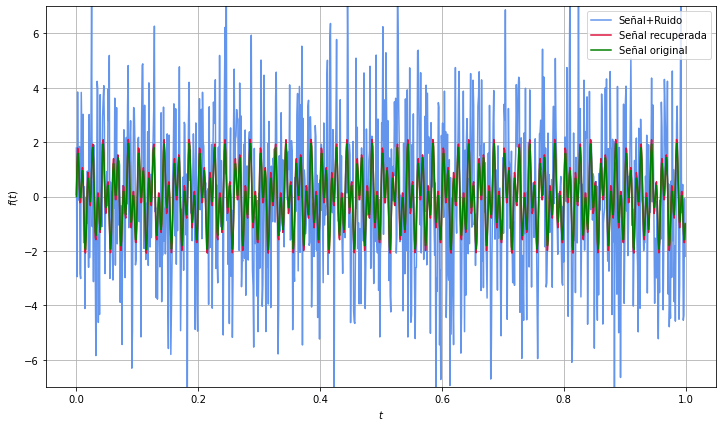

In [26]:
plt.figure(figsize=(12,7))
plt.plot(t, signal, color='cornflowerblue', label='Señal+Ruido')
plt.plot(t, np.real(signal_filtered), color='crimson', label='Señal recuperada')
plt.plot(t, clean_signal, color='green', label='Señal original')
plt.title('')
plt.ylim(-7,7)
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()
plt.grid()
plt.show()

---
---


In [20]:
## Create the synthetic signal
dt = 0.001
t = np.arange(0, 1, dt)
signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # composite signal
signal_clean = signal # copy for later comparison
signal = signal + 2.5 * np.random.randn(len(t))

data = np.column_stack((t,signal))
np.savetxt('synth_signal.txt',data)
data = np.column_stack((t,signal_clean))
np.savetxt('clean_synth_signal.txt',signal_clean)